<a href="https://colab.research.google.com/github/YoonSungLee/AI-Innovation-Square_Vision/blob/master/Day%209_Autoencoder%20%ED%99%9C%EC%9A%A9%ED%95%98%EA%B8%B0/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [0]:
# encoding_dim이나 hidden layer의 수는 개발자가 임의로 정하는 요소

# encoding dim은 축소된 representation vector의 크기를 말합니다.
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats


input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded) # 0~1의 출력을 만들어줘서 input data(0~1사이의 데이터들)와 비교

autoencoder = Model(input_img, decoded)

W0712 07:27:48.006177 139625664034688 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 07:27:48.043637 139625664034688 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 07:27:48.050662 139625664034688 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [0]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

W0712 07:27:55.593983 139625664034688 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 07:27:55.619797 139625664034688 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0712 07:27:55.625797 139625664034688 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/nn_impl.py:180: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [0]:
x_train = x_train.astype('float32') / 255. # normalization/ x_train.shape = (60000, 28, 28, 1)
x_test = x_test.astype('float32') / 255. # normalization/ x_test.shape = (10000, 28, 28, 1)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) # np.prod(x_train.shape[1:]) == 28*28*1/ flatten과 동일한 효과
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) # np.prod(x_train.shape[1:]) == 28*28*1/ flatten과 동일한 효과
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


In [0]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256, # 한 번에 256장 학습, 평균 loss값을 구해 backpropagation, 작을수록 학습이 잘 되는 경향(대게 최소 16)
                shuffle=True,
                validation_data=(x_test, x_test))

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

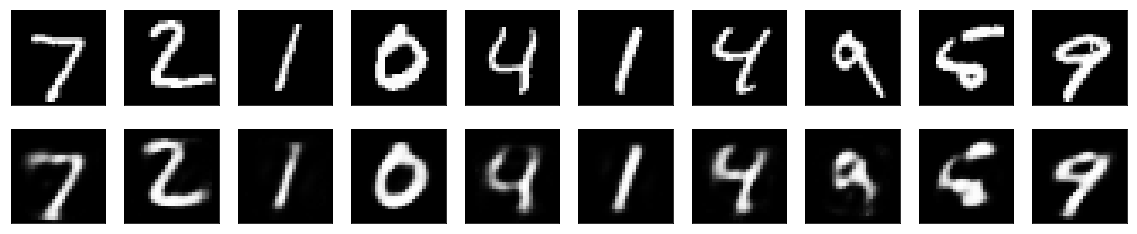

In [0]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Deep autoencoder by stack dense layers

In [0]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [0]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.3429 - val_loss: 0.2629
Epoch 2/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.2581 - val_loss: 0.2526
Epoch 3/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.2422 - val_loss: 0.2282
Epoch 4/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.2222 - val_loss: 0.2169
Epoch 5/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.2117 - val_loss: 0.2040
Epoch 6/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1973 - val_loss: 0.1909
Epoch 7/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1869 - val_loss: 0.1828
Epoch 8/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1794 - val_loss: 0.1743
Epoch 9/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1718 - val_loss: 0.1

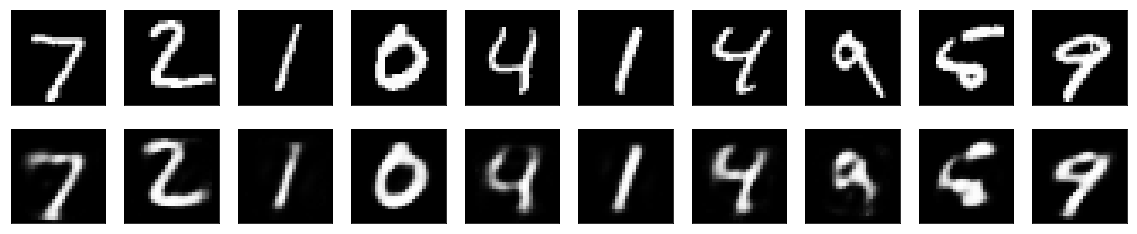

In [0]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()